# Multiple Sequence Alignment (MSA)

```
헤모글로빈 단백질 중 HBA 단백질의 서열에 대해 MSA를 진행한다.
MSA 도구는 MUSCLE 을 사용한다.
MSA 결과를 시각화하고 계통수를 그린다.

clustal : ClustalW or ClustalX
emboss  : EMBOSS
stockholm : PFAM
```

In [1]:
from Bio import AlignIO
from Bio.Align.Applications import MuscleCommandline

In [2]:
alignment = AlignIO.read("data/HBA.aln","clustal") 
print(alignment)

SingleLetterAlphabet() alignment with 7 rows and 142 columns
MVLSAADKNNVKGIFTKIAGHAEEYGAETLERMFTTYPPTKTYF...KYR sp|P01994|HBA_CHICK
MVLSPTDKSNVKATWAKIGNHGAEYGAEALERMFMNFPSTKTYF...KYR sp|P18971|HBA_BALAC
MVLSPADKTNIKTAWEKIGSHGGEYGAEAVERMFLGFPTTKTYF...KYR sp|P01948|HBA_RABIT
MVLSGEDKSNIKAAWGKIGGHGAEYGAEALERMFASFPTTKTYF...KYR sp|P01942|HBA_MOUSE
MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYF...KYR sp|P69907|HBA_PANTR
MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYF...KYR sp|P69905|HBA_HUMAN
MVLSAADKTNVKAAWSKVGGHAGEYGAEALERMFLGFPTTKTYF...KYR sp|P01958|HBA_HORSE


In [3]:
# id & sequence
for record in alignment: 
    print("%s --- %s" % (record.id, record.seq[:80]))

sp|P01994|HBA_CHICK --- MVLSAADKNNVKGIFTKIAGHAEEYGAETLERMFTTYPPTKTYFPHFDLSHGSAQIKGHGKKVVAALIEAANHIDDIAGT
sp|P18971|HBA_BALAC --- MVLSPTDKSNVKATWAKIGNHGAEYGAEALERMFMNFPSTKTYFPHFDLGHDSAQVKGHGKKVADALTKAVGHMDNLLDA
sp|P01948|HBA_RABIT --- MVLSPADKTNIKTAWEKIGSHGGEYGAEAVERMFLGFPTTKTYFPHFDFTHGSEQIKAHGKKVSEALTKAVGHLDDLPGA
sp|P01942|HBA_MOUSE --- MVLSGEDKSNIKAAWGKIGGHGAEYGAEALERMFASFPTTKTYFPHFDVSHGSAQVKGHGKKVADALASAAGHLDDLPGA
sp|P69907|HBA_PANTR --- MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNA
sp|P69905|HBA_HUMAN --- MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNA
sp|P01958|HBA_HORSE --- MVLSAADKTNVKAAWSKVGGHAGEYGAEALERMFLGFPTTKTYFPHFDLSHGSAQVKAHGKKVGDALTLAVGHLDDLPGA


### MSA 도구인 MUSCLE 사용

http://drive5.com/muscle/downloads.htm

In [4]:
# 프로그램 실행파일 경로
muscle_exe = 'd:/Github/bioinformatics/prg/muscle3.8.31_i86win32'

In [5]:
# fasta를 읽어 MSA 데이터를 생성
cmd_line = MuscleCommandline(muscle_exe, input="data/HBA.all.fasta", out="data/HBA.aln", clw=" ")

# clw : clustal format 사용
print(cmd_line)

d:/Github/bioinformatics/prg/muscle3.8.31_i86win32 -in data/HBA.all.fasta -out data/HBA.aln -clw


In [6]:
stdout, stderr = cmd_line()

### WebLogo : MSA 시각화 도구

MSA 각 서열의 공통부분 비율을 표현

In [7]:
from Bio import motifs
from Bio.motifs import Motif
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio import Phylo

from IPython.display import Image

In [8]:
instances = [Seq("TACAA"), 
             Seq("TACGC"), 
             Seq("TACAC"), 
             Seq("TACCC"), 
             Seq("AACCC"), 
             Seq("AATGC"), 
             Seq("AATGC"), 
            ] 

m = motifs.create(instances) 
print(m.counts)

        0      1      2      3      4
A:   3.00   7.00   0.00   2.00   1.00
C:   0.00   0.00   5.00   2.00   6.00
G:   0.00   0.00   0.00   3.00   0.00
T:   4.00   0.00   2.00   0.00   0.00



C:\Anaconda3\envs\py37_env\lib\site-packages\Bio\motifs\__init__.py:610: BiopythonDeprecationWarning: Motif.format has been deprecated, and we intend to remove it in a future release of Biopython. Instead of motif.format(format_spec), please use format(motif, format_spec).
  BiopythonDeprecationWarning,


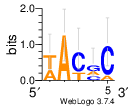

In [9]:
Motif.weblogo(m,'test.png')
Image('test.png')

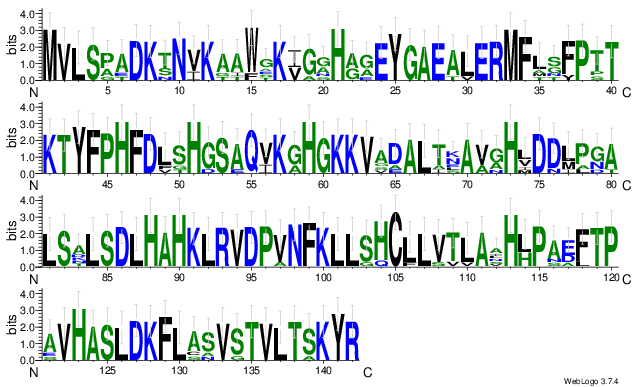

In [10]:
alignment = AlignIO.read("data/HBA.aln","clustal")

instance = []
for record in alignment:
    s = Seq(str(record.seq), IUPAC.protein)
    instance.append(s)
    
m = motifs.create(instance)
Motif.weblogo(m,'HBA_WebLogo.png')
Image('HBA_WebLogo.png')

### 계통수(phylogenetic tree) 그리기

* msa (clustalW) to newick format : https://www.ebi.ac.uk/Tools/phylogeny/simple_phylogeny/


In [11]:
tree = Phylo.read('data/HBA.newick', 'newick') 
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.00537)
            Clade(branch_length=0.29387, name='sp|P01994|HBA_CHICK')
            Clade(branch_length=0.01203)
                Clade(branch_length=0.01282)
                    Clade(branch_length=0.1181, name='sp|P60529|HBA_CANLF')
                    Clade(branch_length=0.10357, name='sp|P01948|HBA_RABIT')
                Clade(branch_length=0.00617)
                    Clade(branch_length=0.05673)
                        Clade(branch_length=0.0, name='sp|P69907|HBA_PANTR')
                        Clade(branch_length=0.0, name='sp|P69905|HBA_HUMAN')
                    Clade(branch_length=0.07405, name='sp|P01958|HBA_HORSE')
        Clade(branch_length=0.13313, name='sp|P18971|HBA_BALAC')
        Clade(branch_length=0.06808, name='sp|P01942|HBA_MOUSE')


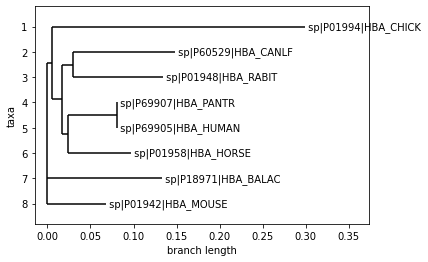

In [12]:
Phylo.draw(tree)

# BLAST (Basic Local Alignment Search Tool)

유사한 DNA, RNA, Protein 서열을 데이터베이스에서 찾아주는 도구

https://blast.ncbi.nlm.nih.gov/Blast.cgi

In [13]:
from Bio import SeqIO
from Bio.Blast import NCBIWWW, NCBIXML

In [14]:
record = SeqIO.read("data/buccal_swab.unmapped1.fasta", format="fasta") 

# program : blastn, blastp, blastx, tblastn, or tblastx
# nt : database. nr, nt, ...

handle = NCBIWWW.qblast("blastn", "nt", record.format("fasta"))  

# blast 결과인 xml 파일 파싱
blast_records = NCBIXML.parse(handle)

E_VALUE_THRESHOLD = 0.05

for blast_record in blast_records:
    for alignment in blast_record.alignments:
        for hsp in alignment.hsps:
            if hsp.expect < E_VALUE_THRESHOLD:
                print(alignment.title)
                print(alignment.length)
                print(hsp.expect)
                print(hsp.query[0:75])
                print(hsp.match[0:75]) 
                print(hsp.sbjct[0:75])
                print('-------------')

gi|1776204818|gb|CP045931.1| Streptococcus pneumoniae strain AUSMDU00010538 chromosome, complete genome
2090792
1.15141e-35
CTTTTGTTAATCGATGATATACAGTCACTCAGCGGAAAAAAAGTCGCAACTCAGGAAGAATTTTTCAATACCTTT
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
CTTTTGTTAATCGATGATATACAGTCACTCAGCGGAAAAAAAGTCGCAACTCAGGAAGAATTTTTCAATACCTTT
-------------
gi|1601506830|emb|LR536837.1| Streptococcus pneumoniae strain 2245STDY6106635 genome assembly, chromosome: 1
2126260
1.15141e-35
CTTTTGTTAATCGATGATATACAGTCACTCAGCGGAAAAAAAGTCGCAACTCAGGAAGAATTTTTCAATACCTTT
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
CTTTTGTTAATCGATGATATACAGTCACTCAGCGGAAAAAAAGTCGCAACTCAGGAAGAATTTTTCAATACCTTT
-------------
gi|1601504866|emb|LR536835.1| Streptococcus pneumoniae strain 2245STDY6020240 genome assembly, chromosome: 1
1986889
1.15141e-35
CTTTTGTTAATCGATGATATACAGTCACTCAGCGGAAAAAAAGTCGCAACTCAGGAAGAATTTTTCAATACCTTT
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||